# Chapter 5: Consistency, stability and convergence of methods for evolutionary PDEs

In this chapter we 
1.    
2.    
3.   
4. 
5.   

Before we looked at function approximation methods... here we analyse methods for PDEs directly

## Parabolic equations?

### A finite difference method for the diffusion equation

Consider the $(1+1)$-dimensional diffusion equation,
$$
\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}, \qquad x \in (0, 1),\qquad t \in (0, T]
$$
subject to the initial and boundary data
$$
u(x,0) = f(x), \qquad 0 \leq x \leq 1, \qquad u(0,t) = \varphi_0(t), \qquad u(1,t) = \varphi_1(t), \qquad t \geq 0.
$$
We shall analyse a finite difference method for this PDE initial / boundary value problem.

We discretise the spatial variable as follows,
$$
x_j = j h, \qquad h = \frac{1}{n_x + 1}, \qquad j = 0, \ldots, n_x + 1,
$$
and the temporal variable,
$$
t_i = i\tau, \qquad \tau = \frac{T}{n_t}, \qquad i = 0, 1, 2, \ldots, n_t.
$$
Let 
$$
u(x_j, t_i) := \tilde{u}^i_j \approx u^{i}_j.
$$
We set
$$
u(x_j, 0) = \tilde{u}^0_j =  f(x_j) =  u^{0}_j, \qquad j = 1, \ldots, n_x
$$
and
$$
u(0,t_i)  = \tilde{u}^i_0 = \varphi_0(t_i) =  u^i_0, \qquad u(1,t_i) =  \tilde{u}^i_{n_x + 1} = \varphi_1(t_i) =  u^i_{n_x +1}, \qquad i \geq 0.
$$


### Order and convergence

Let's replace the time derivative with a (first-order) forward difference and the second spatial derivative with a (second-order) central difference approximation: from Taylor's theorem (see Chapter 1), there exists a $\xi \in [t_i, t_{i+1}]$ such that
$$
\frac{u(x_j,t_{i+1}) - u(x_j,t_{i})}{\tau} =\frac{\tilde{u}^{i+1}_j - \tilde{u}^i_j}{\tau} = u_t(x_j,t_i) + \frac{\tau}{2}u_{tt}(x_j,\xi).
$$
Let's assume that $u_{tt}(x,t)$ exists and is bounded on $(x,t) \in [0,1]\times[0,T]$, then we have
$$
\frac{\tilde{u}^{i+1}_j - \tilde{u}^i_j}{\tau} = u_t(x_j,t_i) + \mathcal{O}(\tau), \qquad \tau \to 0.
$$
Similarly, if we assume that $u_{xxxx}(x,t)$ exists and is bounded on $(x,t) \in [0,1]\times[0,T]$, then we have (see Chapter 1 Exercises)
$$
\frac{\tilde{u}^{i}_{j+1} - 2\tilde{u}^i_j + \tilde{u}^i_{j-1}}{h^2} = u_{xx}(x_j,t_i) + \mathcal{O}(h^2), \qquad h \to 0.
$$
We define
$$
\mu = \frac{\tau}{h^2},
$$
which is known as the Courant number and specify that $\mu$ be held constant as $\tau, h \to 0$. Hence, we have that
$$
\frac{\tilde{u}^{i+1}_j - \tilde{u}^i_j}{\tau} - \frac{\tilde{u}^{i}_{j+1} - 2\tilde{u}^i_j + \tilde{u}^i_{j-1}}{h^2} = u_t(x_j,t_i) - u_{xx}(x_j,t_i) + \mathcal{O}(h^2) =  \mathcal{O}(h^2), \qquad h \to 0.
$$
We shall approximate the solution to the diffusion equation with the finite difference method
$$
\frac{u^{i+1}_j - u^i_j}{\tau} - \frac{u^{i}_{j+1} - 2u^i_j + u^i_{j-1}}{h^2} = 0
$$
or
$$
u^{i+1}_j = u^i_j + \mu \left( u^{i}_{j+1} - 2u^i_j + u^i_{j-1}  \right).
$$
This method is known as **Euler's method**.
Notice we have shown that if the exact solution is substituted into the finite difference method, then the PDE is recovered exactly and the local error tends to zero as the discretisation parameters tend to zero.  The method is **second order** since the local error approaches zero at the rate $\mathcal{O}(h^2)$ as $h \to 0$. A finite difference method of order $p \geq 1$ is said to be **consistent**.  Notice that for consistency, we only require the error at $(x_j,t_i)$  to go to zero as the discretisation parameters tend to zero, hence the order of a method measures the local error.  A method is said to be **convergent** if the *global* error tends to zero as the discretisation parameters tend to zero, i.e., if
$$
\lim_{h \to 0}\left[\lim_{j \to x/h}\left( \lim_{i \to t/\tau} u^i_j \right)   \right] = u(x,t), \qquad x \in [0, 1], \qquad t \in [0, T],
$$
where $\mu = \tau/h^2$ is kept constant as $h \to 0$.



### Numerical experiments with Euler's method

Before we analyse the convergence or otherwise of Euler's method, let's perform some numerical experiments.  First, we note that we can express Euler's method as
$$
\underbrace{\begin{bmatrix}
u^{i+1}_{1} \\
\vdots \\
\vdots \\
\vdots \\
u^{i+1}_{n_x}
\end{bmatrix}}_{\mathbf{u}^{i+1}} = 
\underbrace{\begin{bmatrix}
1 - 2\mu & \mu & & & \\
\mu  & 1-2\mu & \mu  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & \mu    & 1- 2\mu & \mu \\
      &        &        &\mu      & 1-2\mu
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
u^{i}_{1} \\
\vdots \\
\vdots \\
\vdots \\
u^{i}_{n_x}
\end{bmatrix}}_{\mathbf{u}^i}
+
\underbrace{\begin{bmatrix}
\mu\varphi_0(t_i) \\
0 \\
\vdots \\
0 \\
\mu \varphi_1(t_i)
\end{bmatrix}}_{\mathbf{k}^i}
$$
i.e., 
$$
\mathbf{u}^{i+1} = A\mathbf{u}^i + \mathbf{k}^i, \qquad i = 0, \ldots, n_t-1.
$$

In [133]:
using LinearAlgebra, Plots, SparseArrays, DifferentialEquations

In [134]:
function Euler(f,ϕ0,ϕ1,nx,μ,T)
    
    x = range(0,1,nx + 2)
    h = 1/(nx+1)
    τ = μ*h^2
    t = 0:τ:T
    nt = length(t)-1
    A = SymTridiagonal(fill((1 - 2μ),nx),fill(μ,nx-1))
    u = zeros(nt+1,nx+2)
    u[:,1] = ϕ0.(t)
    u[:,nx+2] = ϕ1.(t)
    u[1,2:nx+1] = f.(x[2:nx+1])

    for i = 1:nt
        u[i+1,2:nx+1] = A*u[i,2:nx+1] 
        u[i+1,2] += μ*ϕ0(t[i])
        u[i+1,nx+1] += μ*ϕ1(t[i])
    end
    
    u, x, t
end

Euler (generic function with 1 method)

The diffusion initial / boundary value problem with 
$$
u(x,0) = f(x) = \sin \frac{1}{2}\pi x + \frac{1}{2}\sin 2\pi x, \qquad 0 \leq x \leq 1, 
$$
and
$$
u(0,t) = \varphi_0(t) = 0, \qquad  u(1,t) = \varphi_1(t) = {\rm e}^{-\pi^2 t/4}, \qquad t \geq 0,
$$
has the exact solution
$$
u(x,t) = {\rm e}^{-\pi^2 t/4}\sin \frac{1}{2}\pi x + \frac{1}{2}{\rm e}^{-4\pi^2 t}\sin 2\pi x, \qquad 0 \leq x \leq 1, \qquad t \geq 0.
$$

In [135]:
f = x -> sin(π*x/2) + 0.5*sin(2π*x)
ϕ1 = t -> exp(-π^2*t/4)
ϕ0 = t -> 0
nx = 50
μ = 0.50
T = 1
u,x,t = Euler(f,ϕ0,ϕ1,nx,μ,T)
nt = length(t) -1

5202

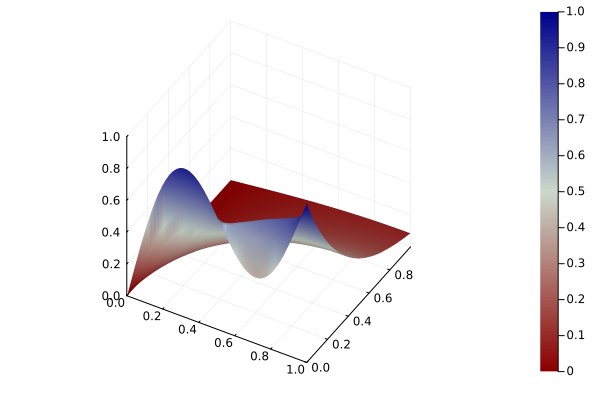

In [136]:
inc = 100
surface(x,t[1:inc:end],u[1:inc:end,:],seriescolor=:redsblues, camera=(30,40))

[ Info: Saved animation to C:\Users\mfaso\OneDrive\Documents\GitHub\Computational-PDEs\LectureNotes\tmp.gif


Plots.AnimatedGif("C:\\Users\\mfaso\\OneDrive\\Documents\\GitHub\\Computational-PDEs\\LectureNotes\\tmp.gif")
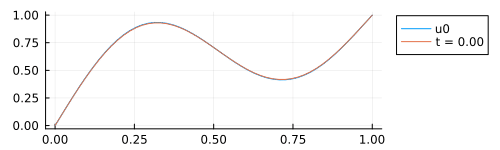

In [139]:
@gif for i = 2:50:nt+1 
    plot(x, u[1,:], size = (500, 150), label = "u0")
    plot!(x, u[i,:], label = "t = " * (@sprintf("%.2f", t[i])), legend = :outertopright)
end

In [140]:
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
ue = (x,t) -> exp(-π^2*t/4)*sin(π*x/2) + 0.5*exp(-4*π^2*t)*sin(2π*x)
error = ue.(xx,tt) - u 
e1 = maximum(error)

0.00047001331601359553

If we double $n_x$, the the error decreases by roughly a factor of $4$.

In [141]:
nx *= 2
u,x,t = Euler(f,ϕ0,ϕ1,nx,μ,T)
@show nt = length(t) - 1
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
error = ue.(xx,tt) - u
e2 = maximum(error)
e1/e2

nt = length(t) - 1 = 20402


3.929469183388294

This suggests the error decays as $\mathcal{O}(n_x^{-2})$, $n_x \to \infty$.

In [142]:
nx = 30
μ = 0.51
u,x,t = Euler(f,ϕ0,ϕ1,nx,μ,T);

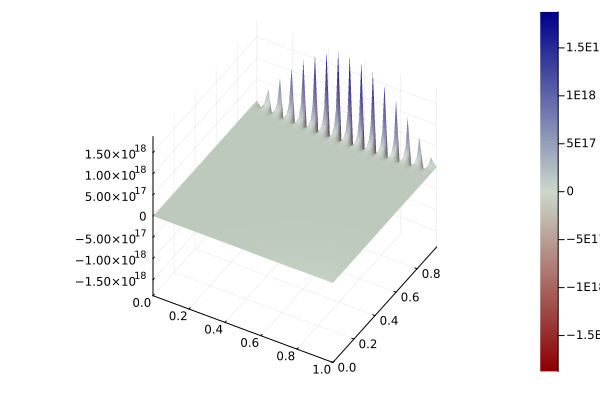

In [143]:
surface(x,t[1:30:end],u[1:30:end,:],seriescolor=:redsblues, camera=(30,40))

[ Info: Saved animation to C:\Users\mfaso\OneDrive\Documents\GitHub\Computational-PDEs\LectureNotes\tmp.gif


Plots.AnimatedGif("C:\\Users\\mfaso\\OneDrive\\Documents\\GitHub\\Computational-PDEs\\LectureNotes\\tmp.gif")
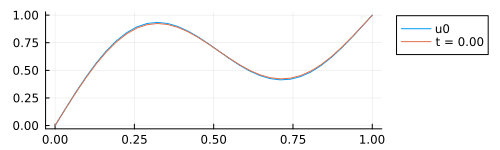

In [150]:
nt = length(t)-1
@gif for i = 2:4:nt÷2 
    plot(x, u[1,:], size = (500, 150), label = "u0")
    plot!(x, u[i,:], label = "t = " * (@sprintf("%.2f", t[i])), legend = :outertopright)
end

Based on these experiments, we conjecture that Euler's method converges if $\mu \leq \frac{1}{2}$.

The initial condition is "smoothed out" by the diffusion equation.  Here is another example:

In [151]:
f = x -> x <= 0.5 ? 2*x : 2-2*x
ϕ1 = t -> 0
ϕ0 = t -> 0
nx = 19
μ = 0.50
T = 0.25
u,x,t = Euler(f,ϕ0,ϕ1,nx,μ,T);

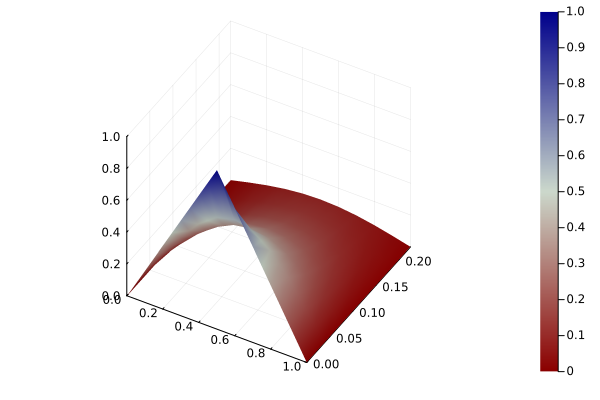

In [152]:
surface(x,t[1:30:end],u[1:30:end,:],seriescolor=:redsblues, camera=(30,40))

[ Info: Saved animation to C:\Users\mfaso\OneDrive\Documents\GitHub\Computational-PDEs\LectureNotes\tmp.gif


Plots.AnimatedGif("C:\\Users\\mfaso\\OneDrive\\Documents\\GitHub\\Computational-PDEs\\LectureNotes\\tmp.gif")
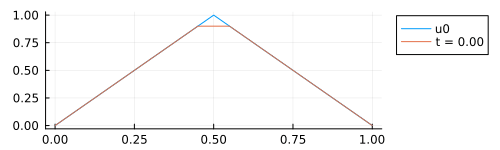

In [154]:
nt = length(t)-1
@gif for i = 2:nt 
    plot(x, u[1,:], size = (500, 150), label = "u0")
    plot!(x, u[i,:], label = "t = " * (@sprintf("%.2f", t[i])), legend = :outertopright)
end

### Convergence of Euler's method

**Proposition** If $\mu \leq \frac{1}{2}$, then Euler's method converges.

**Proof** Recall that
$$
\frac{\tilde{u}^{i+1}_j - \tilde{u}^i_j}{\tau} - \frac{\tilde{u}^{i}_{j+1} - 2\tilde{u}^i_j + \tilde{u}^i_{j-1}}{h^2}  =  \mathcal{O}(h^2), \qquad h \to 0,
$$
which implies
$$
\tilde{u}^{i+1}_j = \tilde{u}^i_j + \mu \left(\tilde{u}^{i}_{j+1} - 2\tilde{u}^i_j + \tilde{u}^i_{j-1}\right)  +  \mathcal{O}(h^4), \qquad h \to 0.
$$
Let $e^i_j = \tilde{u}^i_j - u^i_j$, then since
$$
u^{i+1}_j = u^i_j + \mu \left( u^{i}_{j+1} - 2u^i_j + u^i_{j-1}  \right),
$$
we have
$$
e^{i+1}_j = e^i_j + \mu \left( e^{i}_{j+1} - 2e^i_j + e^i_{j-1}  \right) + \mathcal{O}(h^4), \qquad h \to 0.
$$
This means that for sufficiently small $h > 0$, there exists a constant $c$ such that 
$$
\left\vert e^{i+1}_j -  e^i_j - \mu \left( e^{i}_{j+1} - 2e^i_j + e^i_{j-1}  \right) \right\vert  \leq ch^4.
$$
Hence, for sufficiently small $h$, we have
$$
\begin{eqnarray*}
\vert e^{i+1}_j \vert &\leq& \left\vert e^i_j + \mu ( e^{i}_{j+1} - 2e^i_j + e^i_{j-1} ) \right\vert + ch^4\\
 & \leq & \mu \vert e^i_{j-1} \vert + \vert 1 - 2\mu \vert \vert e^i_{j} \vert  + \mu \vert e^i_{j+1} \vert + ch^4  \\
 & \leq & \left(2\mu  + \vert 1 - 2\mu \vert \right) \eta^i  + ch^4  
\end{eqnarray*}
$$
where 
$$
\eta^{i} = \max_{j = 0, \ldots, n_x+1}\vert e^i_j \vert.
$$
The above inequality holds for $\vert e^{i+1}_j \vert$, with $j = 0, \ldots, n_x+1$ and therefore it also holds for $\vert  \eta^{i+1} \vert$. Since $0 < \mu \leq 1/2$ and $u^0_j = \tilde{u}^0_j$, which implies that $\eta^0$, we have that
$$
\eta^{i+1} \leq \eta^i  + ch^4 \leq \eta^{i-1} + 2ch^4 \leq \cdots \leq \eta^{0} + (i+1)ch^4 = (i+1)ch^4.
$$
Therefore
$$
\eta^{n_t} \leq c n_th^4 = \frac{c}{\mu} n_t\mu h^4 = \frac{c}{\mu} n_t\tau h^2 = \frac{c}{\mu}T h^2 
$$
We conclude that $\eta^i \to 0$ for $i = 0, \ldots, n_t$ as $h \to 0$ and therefore $e^i_j \to 0$ as $h \to 0$ for $j = 0, \ldots, n_x + 1$ and $i = 0, \ldots, n_t$ as $h \to 0$, which implies that the method converges.   $\blacksquare$

**Remark:** Notice that the maximum error of the Euler method (assuming all relevant partial derivatives exist and are bounded) is bounded by $\frac{c}{\mu}T h^2$ for sufficiently small $h$. This confirms our numerical observation above that the method converges at the rate $\mathcal{O}(h^2)$ as $h \to 0$, or equivalently, at the rate $\mathcal{O}(n_x^{-2})$ as $n_x \to \infty$ (i.e., the method is second order).

### Well-posedness and ill-posedness of PDE problems

A PDE intial and / or boundary value problem is **well-posed** if there exists a unique solution that depends continuously on the initial and boundary data.  Otherwise, the PDE problem is said to be **ill-posed**.

**Example:**  Suppose $\varphi_0(t) = \varphi_1(t) = 0$ (i.e., zero Dirichlet boundary conditions), then using the method of separation of variables, it can be shown that if
$$
u(x,0) = f(x) = \sum_{m = 1}^{\infty}\alpha_m \sin \pi m x, \qquad 0 \leq x \leq 1,
$$
then the solution to the diffusion equation is
$$
u(x,t) = \sum_{m = 1}^{\infty}\alpha_m {\rm e}^{-\pi^2m^2 t} \sin \pi m x, \qquad 0 \leq x \leq 1, \qquad t \geq 0.
$$
The $2$-norm of a function $g$ on $[0, 1]$, or $L^2$ norm, is defined as
$$
\| g \|_2 = \left( \int_0^1 \left[g(x)\right]^2\,{\rm d}x   \right)^{1/2}
$$
Hence,
$$
\begin{eqnarray*}
\|u(x,t)\|_2^2 &=& \int_0^1 \left[u(x,t)\right]^2\,{\rm d}x  = \int_0^1 \left(\sum_{m = 1}^{\infty}\alpha_m {\rm e}^{-\pi^2m^2 t} \sin \pi m x  \right)^2\,{\rm d}x \\
&=& \sum_{m=1}^{\infty}\sum_{j=1}^{\infty} \alpha_m \alpha_j{\rm e}^{-\pi^2(m^2 + j^2) t}\int_0^1 \sin\pi m x\sin \pi j x\, {\rm d}x
\end{eqnarray*}
$$
and since
$$
\int_0^1 \sin \pi m x \sin \pi j x\, {\rm d}x = \begin{cases}
\frac{1}{2}, & m  = j, \\
0, & \text{otherwise}
\end{cases}
$$
we have
$$
\|u(x,t)\|_2^2 =  \frac{1}{2}\sum_{m=1}^{\infty} \alpha_m^2 {\rm e}^{-2\pi^2 m^2 t} \leq \frac{1}{2}\sum_{m=1}^{\infty} \alpha_m^2 = \| u(x,0) \|_2^2.
$$
Suppose that $\tilde{u}(x,t)$ is the solution to the diffusion equation with zero boundary conditions and a slightly perturbed initial condition, i.e.,
$$
\tilde{u}(x,0) = \tilde{f}(x) = \sum_{m = 1}^{\infty}\tilde{\alpha}_m \sin \pi m x, \qquad 0 \leq x \leq 1,
$$
where
$$
\| \tilde{u}(x,0) - u(x,0) \|_2^2 = \| \tilde{f}(x) - f(x) \|_2^2 = \frac{1}{2}\sum_{m=1}^{\infty} \left(  \tilde{\alpha}_m -    \alpha_m  \right)^2   \leq \epsilon^2 \ll 1
$$
then
$$
\tilde{u}(x,t) = \sum_{m = 1}^{\infty}\tilde{\alpha}_m {\rm e}^{-\pi^2m^2 t} \sin \pi m x, \qquad 0 \leq x \leq 1, \qquad t \geq 0
$$
and therefore
$$
\|\tilde{u}(x,t) - u(x,t)\|_2^2   \leq  \| \tilde{u}(x,0) -  u(x,0) \|_2^2 = \epsilon^2.
$$
This shows that if $\| \tilde{u}(x,0) -  u(x,0) \|_2$ is small, then $\|\tilde{u}(x,t) - u(x,t)\|_2$ is also small, which shows that the solution depends continuously on the initial data, i.e., the diffusion equation with zero Dirichlet boundary conditions is well-posed.

As an example of an ill-posed problem, consider the reversed-time diffusion equation:
$$
\frac{\partial u}{\partial t}=-\frac{\partial^2 u}{\partial x^2}, \qquad x \in (0, 1),\qquad t \in (0, T],
$$
subject to zero Dirichlet boundary conditions. If
$$
u(x,0) = f(x) = \sum_{m = 1}^{\infty}\alpha_m \sin \pi m x, \qquad 0 \leq x \leq 1,
$$
then
$$
u(x,t) = \sum_{m = 1}^{\infty}\alpha_m {\rm e}^{\pi^2m^2 t} \sin \pi m x, \qquad 0 \leq x \leq 1, \qquad t \geq 0.
$$
Now suppose we have initial data such that
$$
\alpha_m, \tilde{\alpha}_m = 0, \qquad m > N
$$
and
$$
\tilde{\alpha}_m -    \alpha_m  = \epsilon\sqrt{\frac{2}{N}}
$$
so that
$$
\| \tilde{u}(x,0) - u(x,0) \|_2^2 = \frac{1}{2}\sum_{m=1}^{N} \left(  \tilde{\alpha}_m -    \alpha_m  \right)^2     = \epsilon^2
$$
then for $t > 0$
$$
\|\tilde{u}(x,t) - u(x,t)\|_2^2 =  \frac{1}{2}\sum_{m=1}^{N} \left(\tilde{\alpha}_m - \alpha_m\right)^2 {\rm e}^{2\pi^2 m^2 t} = \frac{\epsilon^2}{N}\sum_{m=1}^{N} {\rm e}^{2\pi^2 m^2 t} \to \infty, \qquad N\to \infty.
$$
This shows that for an arbitrarily small perturbation of the initial data ($\|\tilde{u}(x,t) - u(x,t)\|_2 \leq \epsilon$) and for any $t > 0$, the difference between the solutions $u$ and $\tilde{u}$ at time $t$ can be made arbitrarily large by taking $N$ large enough. This shows that reversed-time diffusion equation is ill-posed because the solution does not depend continuously on the initial data.  In physics, the ill-posedness of the reversed-time diffusion equation is related to the impossibility of deducing the thermal history of an object from it present temperature distribution, which is studied in thermodynamics.

### Stability of numerical methods for PDEs

A method is **stable** if, as $h \to 0$ and with $\mu$ constant,
$$
\vert u^i_j \vert < \infty, \qquad    j = 0, \ldots, n_x+1, \qquad i = 0, \ldots, n_t.
$$

The "Fundamental theorem of numerical analysis of differential equations" relates consistency, stability and convergence.

**Theorem (Lax equivalence theorem)** If a PDE problem is well posed, then a numerical method is convergent if and only if it is stable and consistent.

#### The von Neumann method for stability analysis

The von Neumann method for the stability analysis of numerical methods for PDEs is applicable to linear PDEs and in its simplest form, it ignores boundary conditions. The method is essentially a discretised Fourier analysis.  The method proceeds as follows: given a numerical method for a PDE (e.g., a finite difference method), use the ansatz
$$
u^i_j = \lambda^i {\rm e}^{{\rm i}k x_j},
$$
where $k \in \mathbb{Z}$, $x_j = j h$, $j \in \mathbb{Z}$ and $h > 0$. 

**Note:** For the symbol $u^i_j$, $i$ is an index (a superscript), whereas $\lambda^i$ means $\lambda$ raised to the $i$-th power, where $i$ is a non-negative integer.  

Then for stability, we require
$$
\vert \lambda \vert \leq 1, \qquad  k \in \mathbb{Z}, \qquad h > 0
$$
because
$$
\vert u^i_j \vert = \vert \lambda^i {\rm e}^{{\rm i}k x_j} \vert = \vert \lambda^i \vert = \vert \lambda \vert^i.
$$
We only need to consider the one wave $u^i_j = \lambda^i {\rm e}^{{\rm i}k x_j}$ because we assume the PDE and thus also the discretised equations are linear and hence the principle of superposition holds. 

**Example** Here we illustrate the von Neumann method (or von Neumann stability analysis) for Euler's method:
$$
u^{i+1}_j = u^i_j + \mu \left( u^{i}_{j+1} - 2u^i_j + u^i_{j-1}  \right).
$$
Setting $u^i_j = \lambda^i {\rm e}^{{\rm i}k x_j}$, it follows that
$$
\begin{eqnarray*}
\lambda &=& 1 + \mu\left({\rm e}^{{\rm i}kh} - 2 +  {\rm e}^{-{\rm i}kh}  \right)  \\
&=& 1 + \mu\left({\rm e}^{{\rm i}kh/2}  -  {\rm e}^{-{\rm i}kh/2}  \right)^2  \\
&=& 1 - 4\mu \sin^2(kh/2).
\end{eqnarray*}
$$
For stability, we require
$$
\vert \lambda \vert \leq 1 \qquad \Leftrightarrow \qquad  -1 \leq  1 - 4\mu \sin^2(kh/2) \leq 1, \qquad h>0, \qquad k \in \mathbb{Z}.
$$
Since $0 \leq \sin^2(kh/2) \leq 1$ and $\mu > 0$, we conclude that Euler's method is stable if and only if $\mu \leq \frac{1}{2}$.

Earlier we proved from first principles that if $\mu \leq \frac{1}{2}$, then Euler's method converges. An alternative proof relies on the Lax equivalence theorem: first we show that Euler's method is consistent (which we've done already), then we show (using the von Neumann method) that the method is stable iff $\mu \leq \frac{1}{2}$ and then we can conclude that the method is convergent if $\mu \leq \frac{1}{2}$.

#### Stability analysis via matrix analysis

We saw earlier that Euler's method can be formulated as
$$
\mathbf{u}^{i+1} = A\mathbf{u}^i + \mathbf{k}^i, \qquad i = 0, \ldots, n_t-1.
$$
where
$$
\mathbf{u}^i = \begin{bmatrix}
u^{i}_{1} \\
\vdots \\
u^{i}_{n_x}
\end{bmatrix}, \quad A = \begin{bmatrix}
1 - 2\mu & \mu & & & \\
\mu  & 1-2\mu & \mu  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & \mu    & 1- 2\mu & \mu \\
      &        &        &\mu      & 1-2\mu
\end{bmatrix} \in \mathbb{R}^{n_x \times n_x}, \quad \mathbf{k}^i=
\begin{bmatrix}
\mu\varphi_0(t_i) \\
0 \\
\vdots \\
0 \\
\mu \varphi_1(t_i)
\end{bmatrix} \in \mathbb{R}^{n_x}.
$$
A large class of methods for the diffusion equation (and other linear PDEs) can be put into this form.  Before we analyse the stability of these methods using matrix methods, we recall some facts from linear algebra.

Recall the definition of the Euclidean inner product: let
$$
\mathbf{x} = \begin{bmatrix}
x_1 \\
\vdots \\
x_{n_x}
\end{bmatrix},  \mathbf{y} = \begin{bmatrix}
y_1 \\
\vdots \\
y_{n_x}
\end{bmatrix}  \in \mathbb{R}^{n_x}
$$
then
$$
\langle \mathbf{x}, \mathbf{y}\rangle = \mathbf{x}^{\top}\mathbf{y}
$$
If $\mathbf{x}, \mathbf{y} \in \mathbb{C}^{n_x}$, then
$$
\langle \mathbf{x}, \mathbf{y}\rangle = \overline{\mathbf{x}}^{\top}\mathbf{y}.
$$
This inner product induces the Euclidean or $\ell_2$ norm:
$$
\| \mathbf{x} \| = \left(\vert x_1\vert^2 + \cdots + \vert x_{n_x}\vert^2  \right)^{1/2}  = \left(\langle\mathbf{x},\mathbf{x}\rangle\right)^{1/2}.
$$
We shall also use a scaled Euclidean inner product and $\ell_2$ norm:
$$
\langle \mathbf{x}, \mathbf{y}\rangle_{h} := h\langle \mathbf{x}, \mathbf{y}\rangle
$$
and hence
$$
\| \mathbf{x} \|_h = \left(h\langle\mathbf{x},\mathbf{x}\rangle\right)^{1/2} = \sqrt{h}\,\| \mathbf{x}\|.
$$
where $h = \frac{1}{n_x+1}$ and $\mathbf{x}, \mathbf{y} \in \mathbb{C}^{n_x}$ or $\mathbf{x}, \mathbf{y} \in \mathbb{R}^{n_x}$.  One reason for using this inner product is the following: suppose the entries of $\mathbf{f} \in \mathbb{R}^{n_x}$ are the function values $f(x_j)$, $x_j = jh$, $j = 1, \ldots, n_x$, then from the Riemann sum definition of the integral of a function, it follows that as $h \to 0$
$$
\| \mathbf{f} \|_h = \left(h\sum_{j=1}^{n_x} [f(x_j)]^2  \right)^{1/2} \to \left( \int_0^1 [f(x)]^2 \,{\rm d}x  \right)^{1/2} = \| f\|_2.
$$
i.e., the scaled $\ell_2$ vector norm $\|\cdot \|_h$ tends to the $L^2$ function norm. There is another reason for using the scaled norm $\|\cdot \|_h$: suppose $\mathbf{x} \in \mathbb{R}^{n_x}$ is a vector such that each entry $x_j$ satisfies $x_j = \mathcal{O}(h^p)$, $h \to 0$, i.e., for sufficiently small $h$ (say $0 < h < h_0\ll 1$), there's a constant $c>0$ such that $\vert x_j \vert \leq c h^p$ for $j = 1, \ldots, n_x$, then for sufficiently small $h$,
$$
\| \mathbf{x} \|_h = \left(h\sum_{j=1}^{n_x} x_j^2  \right)^{1/2} \leq \left(hn_x c^2h^{2p}  \right)^{1/2} \leq ch^p
$$
i.e., $\| \mathbf{x} \|_h = \mathcal{O}(h^p)$, as $h \to 0$.

 Let $A \in \mathbb{R}^{n_x \times n_x}$, then the matrix 2-norm or matrix Euclidean norm induced by the Euclidean or $\ell_2$ vector norm is
$$
\| A \| = \max_{\mathbf{x} \in \mathbb{R}^n, \mathbf{x}\neq \mathbf{0}} \frac{\| A\mathbf{x} \|}{\| \mathbf{x}\|} = \max_{\|\mathbf{x}\| =1} \| A\mathbf{x} \|.
$$
Since
$$
\frac{\| A\mathbf{x} \|}{\| \mathbf{x}\|} = \frac{\sqrt{h}\| A\mathbf{x} \|}{\sqrt{h}\| \mathbf{x}\|} =  \frac{\| A\mathbf{x} \|_h}{\| \mathbf{x}\|_h},
$$
if follows that 
$$
\| A \|_h = \| A \|.
$$
It follows from the definition of the matrix norm that
$$
\| A \mathbf{x}\| \leq \| A \| \| \mathbf{x} \|, \qquad \| A B\| \leq \| A\| \|B\|
$$
and the same is true in the norm $\| \cdot \|_h$.

The eigenvalues or *spectrum* of a square matrix $A \in \mathbb{C}^{n_x \times n_x}$ is
$$
\sigma(A) = \left\lbrace \lambda \in \mathbb{C} : \det(A - \lambda I)= 0  \right\rbrace.
$$
The *spectral radius* of a square matrix $A \in \mathbb{C}^{n_x \times n_x}$ is
$$
\rho(A) = \max\left\lbrace \vert \lambda \vert : \lambda \in \sigma(A)\right\rbrace
$$
A square matrix $A \in \mathbb{C}^{n_x \times n_x}$ is **normal** if $AA^{*} = A^{*}A$.  Recall that $A^*$ is the conjugate transpose of $A$, hence for  $A \in \mathbb{R}^{n_x \times n_x}$, $A^{*} = A^{\top}$ and thus for a real matrix is normal if $AA^{\top} = A^{\top}A$.

If a matrix is normal, then
$$
\| A \|_h =\| A \| = \rho(A).
$$


A numerical method for the diffusion equation on $(x,t)\in [0, 1]\times[0, T]$ that takes the form
$$
\mathbf{u}^{i+1} = A\mathbf{u}^i + \mathbf{k}^i, \qquad i = 0, \ldots, n_t-1.
$$
where $\mathbf{u}^i \in \mathbb{R}^{n_x}$ and $A \in \mathbb{R}^{n_x \times n_x}$ is **stable** if there exists a $0 < c < \infty$ such that
$$
\lim_{h \to 0}\left( \max_{n = 0, 1, \ldots, n_t} \| A^n \|_h  \right) \leq c
$$
where, as before, $n_t\tau = T$, $h = 1/(n_x + 1)$, $\mu = \tau/h^2$ and $\mu$ is held constant.

**Theorem (stability for methods with normal matrices)** Suppose $A$ is normal, where $A \in \mathbb{R}^{n_x \times n_x}$ or $A \in \mathbb{C}^{n_x \times n_x}$,  then the method 
$$
\mathbf{u}^{i+1} = A\mathbf{u}^i + \mathbf{k}^i, \qquad i = 0, \ldots, n_t-1.
$$
is stable if there exists a $\nu \geq 0$ such that
$$
\rho(A) \leq {\rm e}^{\nu \tau}, \qquad h \to 0,
$$
where $\tau = \mu h^2$. 

**Proof**  For simplicity, let us assume that $A \in \mathbb{R}^{n_x \times n_x}$.  Using the definition of the scaled inner product $\langle \cdot, \cdot \rangle_h$, the normalcy of $A$ and the Cauchy-Schwarz inequality, it follows that for a $\mathbf{w} \in \mathbb{R}^{n_x}$, $\mathbf{w} \neq \mathbf{0}$,
$$
\begin{eqnarray*}
\| A^n \mathbf{w} \|_h^2 &=& \langle A^n\mathbf{w}, A^n\mathbf{w}\rangle_h \\
&=& \langle \mathbf{w},  \left(A^n\right)^{\top}A^n\mathbf{w}\rangle_h \\
&=&  \langle \mathbf{w},  \left(A^{\top}A\right)^n\mathbf{w}\rangle_h \\ 
&\leq & \|  \mathbf{w}\|_h \|\left(A^{\top}A\right)^n\mathbf{w}\|_h \\
&\leq & \|  \mathbf{w}\|_h^2 \|\left(A^{\top}A\right)^n\|_h \\
&\leq & \|  \mathbf{w}\|_h^2 \|A\|_h^{2n}.
\end{eqnarray*}
$$
Therefore, since $A$ is normal and $0 \leq  n \leq n_t$,
$$
\frac{\| A^n \mathbf{w} \|_h}{\|  \mathbf{w}\|_h} \leq \|A\|_h^{n} = \left[\rho(A)\right]^n \leq {\rm e}^{\nu n\tau}\leq  {\rm e}^{\nu n_t\tau} = {\rm e}^{\nu T}.
$$
Since 
$$
\|A^n \|_h = \max_{\mathbf{w}\in \mathbb{R}^{n_x}, \mathbf{w}\neq 0}\frac{\| A^n \mathbf{w} \|_h}{\|  \mathbf{w}\|_h},
$$
the result follows since we've shown that $\|A^n \|_h \leq c$ for $n = 0, \ldots, n_t$ with $c = {\rm e}^{\nu T}$ as $h \to 0$.  $\blacksquare$

**Example (Stability of Euler's method via matrix analysis)** For Euler's method, 
$$
 A = \begin{bmatrix}
1 - 2\mu & \mu & & & \\
\mu  & 1-2\mu & \mu  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & \mu    & 1- 2\mu & \mu \\
      &        &        &\mu      & 1-2\mu
\end{bmatrix} \in \mathbb{R}^{n_x \times n_x}.
$$
Since $A$ is symmetric, it is a normal matrix.  However, $A$ is not just symmetric, it is a TST matrix (tridiagonal, symmetric and Toeplitz) and the eigenvalues of TST matrices are known explicitly: 

**Lemma (eigenvalues of TST matrices)** The eigenvalues of an $n_x \times n_x$ TST matrix with $\alpha$ on the main diagonal and $\beta$ on the first super- and sub-diagonal are
$$
\lambda_j = \alpha + 2\beta\cos\left( \frac{\pi j}{n_x+1}  \right), \qquad j = 1, \ldots, n_x.
$$

**Proof** See *A First Course in the Numerical Analysis of Differential Equations* by A. Iserles, 2nd Edition, p. 264.

Returning to Euler's method, since $h = 1/(n_x+1)$ and $x_j = jh$, the eigenvalues of the matrix $A$ are
$$
\lambda_j = 1-2\mu + 2\mu\cos(\pi x_j) = 1-2\mu +2\mu(1 - 2\sin^2(\pi x_j/2)) = 1 - 4\mu\sin^2(\pi x_j/2) 
$$
for $j = 1, \ldots, n_x$.  If $0 < \mu \leq 1/2$, then $\rho(A) \leq 1$ as $h \to 0$ and hence the above theorem holds with $\nu = 0$ and we conclude that Euler's method is stable, whereas if $\mu > 1/2$, then $\rho(A) > 1$ as $h \to 0$ and there isn't a $\nu > 0$ such that the above theorem holds.

In [52]:
nx = 11
μ = 0.5
A = SymTridiagonal(fill((1 - 2μ),nx),fill(μ,nx-1))
h = 1/(nx+1)
x = h:h:1-h
[eigvals(A) 1 .- 4μ*sin.(π*x[end:-1:1]/2).^2]

11×2 Matrix{Float64}:
 -0.965926     -0.965926
 -0.866025     -0.866025
 -0.707107     -0.707107
 -0.5          -0.5
 -0.258819     -0.258819
 -2.68965e-16   2.22045e-16
  0.258819      0.258819
  0.5           0.5
  0.707107      0.707107
  0.866025      0.866025
  0.965926      0.965926

## Implicit Euler method

Recall that we arrived at Euler's method for the diffusion equation by combining a (first-order) forward difference approximation to the time derivative with a (second-order) central difference approximation to the second spatial derivative.  Suppose now that we approximate the time derivative with a (first-order) *backward* difference approximation 
$$
u_t(x_j,t_i) \approx \frac{u^{i}_j - u^{i-1}_j}{\tau}
$$
and again use a second-order central difference approximation to $u_{xx}$, then we arrive at the method
$$
\frac{u^{i}_j - u^{i-1}_j}{\tau} - \frac{u^{i}_{j+1} - 2u^i_j + u^i_{j-1}}{h^2} = 0
$$
or
$$
u^{i}_j = u^{i+1}_j - \mu \left( u^{i+1}_{j+1} - 2u^{i+1}_j + u^{i+1}_{j-1}  \right), \qquad j = 1, \ldots, n_x,
$$
which is known is the backward Euler method, or the implicit Euler method.

In linear algebra notation, the method becomes

$$
B\mathbf{u}^{i+1} = \mathbf{u}^i + \mathbf{k}^{i+1}
$$
where
$$
\mathbf{u}^i = \begin{bmatrix}
u^{i}_{1} \\
\vdots \\
u^{i}_{n_x}
\end{bmatrix}, \quad  B = \begin{bmatrix}
1 + 2\mu & -\mu & & & \\
-\mu  & 1+2\mu & -\mu  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & -\mu    & 1+ 2\mu & -\mu \\
      &        &        &-\mu      & 1+2\mu
\end{bmatrix} \in \mathbb{R}^{n_x \times n_x}, \quad \mathbf{k}^i=
\begin{bmatrix}
\mu\varphi_0(t_i) \\
0 \\
\vdots \\
0 \\
\mu \varphi_1(t_i)
\end{bmatrix} \in \mathbb{R}^{n_x}.
$$

As with the (explicit) Euler method, the local truncation error is second order
$$
\frac{\tilde{u}^{i}_j - \tilde{u}^{i-1}_j}{\tau} - \frac{\tilde{u}^{i}_{j+1} - 2\tilde{u}^i_j + \tilde{u}^i_{j-1}}{h^2} =  \mathcal{O}(h^2), \qquad h \to 0,
$$
and therefore the method is consistent.  There appears to prefer the implicit Euler method over the explicit Euler method because it has the same order and it is computationally more expensive.   Now, let's consider the stability of the implicit Euler method. 

### Von Neumann stability analysis

Setting
$$
u^i_j = \lambda^i{\rm e}^{{\rm i}k x_j}
$$
in the implicit Euler method, we deduce that
$$
\begin{eqnarray*}
1 &=& \lambda\left[1 - \mu\left({\rm e}^{{\rm i}kh} - 2 + {\rm e}^{-{\rm i}kh} \right)\right] \\
&=& \lambda\left[1 - \mu\left({\rm e}^{{\rm i}kh/2} - {\rm e}^{-{\rm i}kh/2} \right)^2\right] \\
&=& \lambda\left[1 + 4\mu\sin^2(kh/2)\right].
\end{eqnarray*}
$$
For stability, we require
$$
\vert \lambda \vert \leq 1 \qquad \Leftrightarrow \qquad 1 + 4\mu\sin^2(kh/2) \geq 1, \qquad h>0, \qquad k \in \mathbb{Z}.
$$

We conclude that the backward Euler method is stable for all $\mu > 0$.  We say that the backward Euler method is unconditionally stable.  Hence, compared to the explicit Euler method, we can take much larger step sizes while maintaining stability.   However, larger step sizes lead to larger errors.   The ideal method would be high order and unconditionally stable.

### Stability analysis via matrix analysis

The implicit Euler method can be formulated as
$$
\mathbf{u}^{i+1} = A\mathbf{u}^i + \mathbf{b}^i
$$
where $A = B^{-1}$ and $\mathbf{b}^i = B^{-1}\mathbf{k}^{i+1}$.  

The matrix $A$ is normal because
$$
AA^{\top} = B^{-1}B^{-\top} = \left(B^{\top}B  \right)^{-1} = \left(B B^T  \right)^{-1} = B^{-\top}B^{-1} = A^{\top}A.
$$

Since $B$ is a TST matrix, its eigenvalues are
$$
\lambda_j = 1 + 2\mu - 2\mu\cos\left(\pi x_j  \right) = 1 + 2\mu -2\mu(1 - 2\sin^2(\pi x_j/2)) = 1 + 4\mu\sin^2(\pi x_j/2).
$$

Since $\lambda \in \sigma(B)$ iff $\lambda^{-1} \in \sigma(B^{-1})$, we conclude that for any $\mu > 0$ and $h > 0$ 
$$
\rho(A) = \max_{j = 1, \ldots, n_x} \frac{1}{1 + 4\mu \sin^2(\pi x_j/2)} < 1, 
$$
and therefore the implicit Euler method is stable for any $\mu > 0$.

In [56]:
nx = 11
μ = 0.5
B = SymTridiagonal(fill((1 + 2μ),nx),fill(-μ,nx-1))
h = 1/(nx+1)
x = h:h:1-h
norm(eigvals(B) - (1 .+ 4μ*sin.(π*x/2).^2),Inf)

1.3322676295501878e-15

### Numerical experiment

In [23]:
function BackwardEuler(f,ϕ0,ϕ1,nx,μ,T)
    
    x = range(0,1,nx + 2)
    h = 1/(nx+1)
    τ = μ*h^2
    t = 0:τ:T
    nt = length(t)-1
    B = SymTridiagonal(fill((1 + 2μ),nx),fill(-μ,nx-1))
    u = zeros(nt+1,nx+2)
    u[:,1] = ϕ0.(t)
    u[:,nx+2] = ϕ1.(t)
    u[1,2:nx+1] = f.(x[2:nx+1])

    for i = 1:nt
        b = u[i,2:nx+1] 
        b[1] += μ*ϕ0(t[i+1])
        b[nx] += μ*ϕ1(t[i+1])
        u[i+1,2:nx+1] = B\b
    end
    
    u, x, t
end

BackwardEuler (generic function with 1 method)

In [27]:
f = x -> sin(π*x/2) + 0.5*sin(2π*x)
ϕ1 = t -> exp(-π^2*t/4)
ϕ0 = t -> 0
nx = 50
μ = 0.50
T = 1
Euler(f,ϕ0,ϕ1,nx,μ,T)
@time Euler(f,ϕ0,ϕ1,nx,μ,T)
BackwardEuler(f,ϕ0,ϕ1,nx,μ,T)
u,x,t = @time BackwardEuler(f,ϕ0,ϕ1,nx,μ,T)
nt = length(t) -1

  0.004220 seconds (10.42 k allocations: 7.067 MiB)
  0.009966 seconds (20.82 k allocations: 11.750 MiB)


5202

In [28]:
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
error = ue.(xx,tt) - u 
e1 = maximum(error)

0.00091223286366926

In [29]:
μ = 0.50*nx
u,x,t = @time BackwardEuler(f,ϕ0,ϕ1,nx,μ,T)
nt = length(t) -1

  0.000189 seconds (428 allocations: 242.844 KiB)


104

In [30]:
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
error = ue.(xx,tt) - u 
e1 = maximum(error)

0.029907965385205237

## Semi-discretisation / Method of lines

We have seen one approach to designing numerical methods for the diffusion equation: replacing derivatives with finite difference approximations.  Another approach, as the name semi-discretisation implies, is to discretise only the spatial variable.   For example, let
$$
u(x_j,t) \approx v_j(t), \qquad j  = 0, \ldots, n_x + 1, \qquad x_j = jh, \qquad h = \frac{1}{n_x + 1},
$$
and suppose we approximate $u_{xx}$ with a second-order central difference:
$$
u_{xx}(x_j,t) \approx  \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right).
$$
The temporal derivative is approximated by setting $u_t(x_j,t) \approx v_j'(t)$,  hence we approximate the solution to the diffusion equation by solving
$$
v'_j(t) = \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right), \qquad j  = 1, \ldots, n_x.
$$
That is, we approximate the solution to the diffusion equation by the solution to a linear system of ODEs.   This semi-discretisation approach is also known as the *method of lines* because we are approximating the solution by functions $v_j(t)$ on the lines $(x,t) = (x_j,t)$, $t \geq 0$, $j = 1, \ldots, n_x$.

Setting $\tilde{v}_j(t) = u(x_j,t)$ and assuming $\tilde{v}_j(t) = v_j(t)$, it follows that if $u_{xxxx}(x,t)$ is bounded on $(x,t) \in [0,1]\times[0,T]$, then
$$
\tilde{v}'_j(t) = u_t(x_j,t) = \frac{1}{h^2}\left(\tilde{v}_{j+1} - 2\tilde{v}_j + \tilde{v}_{j-1}   \right) = u_{xx}(x_j,t) + \mathcal{O}(h^2), \qquad h \to 0,
$$
and therefore
$$
\tilde{v}'_j(t) - \frac{1}{h^2}\left(\tilde{v}_{j+1} - 2\tilde{v}_j + \tilde{v}_{j-1}   \right) = \mathcal{O}(h^2), \qquad h \to 0,
$$
hence the semi-discrete method is second order and consistent.

### Von Neumann stability analysis of semi-discrete methods

The von Neumann method for the stability analysis of semi-discrete methods is completely analogous to the method for fully discretised methods: we use the ansatz
$$
v_j(t) = \lambda(t){\rm e}^{{\rm i}kx_j}
$$
ignore boundary conditions and since $\vert v_j \vert = \vert\lambda(t) \vert$, for stability we require that
$$
\left\vert \lambda(t)\right \vert \leq c < \infty, \qquad t \in [0, T], \qquad h>0, \qquad k \in \mathbb{Z}.
$$

**Example** For the semi-discrete method above,
$$
v'_j(t) = \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right),
$$
if we set $v_j(t) = \lambda(t){\rm e}^{{\rm i}kx_j}$, then we obtain
$$
\lambda'(t) = \frac{1}{h^2}\left({\rm e}^{{\rm i}kh} - 2 +   ({\rm e}^{-{\rm i}kh} \right)\lambda(t) = -\frac{4\sin^2(kh/2)}{h^2}\lambda(t)
$$
and therefore
$$
\lambda(t) = {\rm e}^{-4t\sin^2(kh/2)/h^2}\lambda(0) 
$$
and the method is stable because for all $h > 0$, $k \in \mathbb{Z}$,
$$
\vert \lambda(t) \vert \leq  \vert \lambda(0) \vert < \infty, \qquad   t \in [0, T].
$$
By the Lax equivalence theorem, we conclude the method is convergent because we have showed that it is consistent and stable.

### Stability analysis via matrix analysis for semi-discrete methods

All semi-discrete methods for the diffusion equation can be cast in the form
$$
\mathbf{v}'(t) = A\mathbf{v}(t) + \mathbf{h}(t), \qquad \mathbf{v}(0) = \mathbf{f}, 
$$
where $\mathbf{v}(t), \mathbf{h}(t) \in \mathbb{R}^{n_x}$ and  $A \in \mathbb{R}^{n_x \times n_x}$.  For example, the method derived above,

$$
v'_j(t) = \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right), \qquad j  = 1, \ldots, n_x,
$$
can be expressed as
$$
\underbrace{\begin{bmatrix}
v'_{1} \\
\vdots \\
\vdots \\
\vdots \\
v'_{n_x}
\end{bmatrix}}_{\mathbf{v}'} = 
\underbrace{\frac{1}{h^2}\begin{bmatrix}
- 2 & 1 & & & \\
1  & -2 & 1  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & 1    & -2 & 1 \\
      &        &        & 1 & -2
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
v_{1} \\
\vdots \\
\vdots \\
\vdots \\
v_{n_x}
\end{bmatrix}}_{\mathbf{v}}
+ 
\underbrace{\frac{1}{h^2}\begin{bmatrix}
\varphi_0(t) \\
0 \\
\vdots \\
0 \\
 \varphi_1(t)
\end{bmatrix}}_{\mathbf{h}(t)}
$$
subject to the initial condition
$$
v_j(0) = u(x_j,0) = f(x_j), \qquad j = 1, \ldots, n_x.
$$

The exact solution to the coupled ODE system $
\mathbf{v}'(t) = A\mathbf{v}(t) + \mathbf{h}(t) 
$ is
$$
\mathbf{v}(t) = {\rm e}^{tA}\mathbf{v}(0) + \int_0^t {\rm e}^{(t - \tau)A}\mathbf{h}(\tau)\,{\rm d}\tau
$$
where the matrix exponential for a square matrix $B \in \mathbb{R}^{n_x \times n_x}$ or $B \in \mathbb{C}^{n_x \times n_x}$ is defined as
$$
    {\rm e}^{B} = \sum_{k=0}^{\infty}\frac{B^k}{k!}.
$$
Therefore we have that a semi-discrete method for the diffusion equation is **stable** if there exists a constant $0 <c < \infty$ such that
$$
\lim_{h \to 0}\left(\max_{t \in [0, T]}\| {\rm e}^{tA}\|_h \right) \leq c.
$$

**Example** Let's consider the method above, for which 
$$
A = \frac{1}{h^2}\begin{bmatrix}
- 2 & 1 & & & \\
1  & -2 & 1  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & 1    & -2 & 1 \\
      &        &        & 1 & -2
\end{bmatrix} \in \mathbb{R}^{n_x \times n_x}.
$$
Since $A$ is a TST matrix, its eigenvalues are
$$
\lambda_j = \frac{1}{h^2}\left[-2 + 2\cos\left(\pi x_j  \right)  \right] = \frac{1}{h^2}\left[-2 + 2\left(1 - 2\sin^2\left(\pi x_j/2  \right)\right)  \right] = -\frac{4}{h^2}\sin^2(\pi x_j/2), \qquad j = 1, \ldots, n_x.
$$
Let's check this:

In [66]:
nx = 11
h = 1/(nx+1)
A = SymTridiagonal(fill(-2,nx),fill(1,nx-1))/h^2
x = h:h:1-h
[eigvals(A) -4/h^2*sin.(π*x[end:-1:1]/2).^2]

11×2 Matrix{Float64}:
 -566.187    -566.187
 -537.415    -537.415
 -491.647    -491.647
 -432.0      -432.0
 -362.54     -362.54
 -288.0      -288.0
 -213.46     -213.46
 -144.0      -144.0
  -84.3532    -84.3532
  -38.5847    -38.5847
   -9.81336    -9.81336

To make more sense of the meaning of the matrix exponential we'll need the following.

**Lemma (eigenvectors of TST matrices)** 
Let $\lambda_j$, $j = 1, \ldots, n_x$ be the eigenvalues of an $n_x \times n_x$ TST matrix with $\alpha$ on the main diagonal and $\beta$ on the first super- and sub-diagonal.  The entries of the corresponding orthogonal eigenvector $\mathbf{q}_j \in \mathbb{R}^{n_x}$ are
$$
q_{j,\ell} = \sqrt{\frac{2}{n_x+1}}\sin\left(\frac{\pi j \ell}{n_x+1}   \right), \qquad \ell = 1, \ldots, n_x,
$$
for $j = 1, \ldots, n_x$.

**Proof** See *A First Course in the Numerical Analysis of Differential Equations* by A. Iserles, 2nd Edition, p. 264.

Hence, we have
$$
A\mathbf{q}_j = \lambda_j\mathbf{q}_j, \qquad j = 1, \ldots, n_x.
$$
Let
$$
Q = \left[\mathbf{q}_1 |  \mathbf{q}_2 | \cdots | \mathbf{q}_{n_x}  \right] \in \mathbb{R}^{n_x \times n_x},
$$
then
$$
AQ = Q\Lambda
$$
where
$$
\Lambda = \begin{bmatrix}
\lambda_1 & & & \\
& \lambda_2 & & \\
 & & \ddots &  \\
&  & & \lambda_{n_x}
\end{bmatrix},
$$
and since the vectors $\mathbf{q}_j$ are orthogonal, the matrix $Q$ is orthogonal, i.e.,  $Q^{\top}Q = I$.
Therefore, the spectral factorisation (eigendecomposition) of $A$ is
$$
A = Q\Lambda Q^{-1} =  Q\Lambda Q^{\top}.
$$


In [77]:
Q = [sqrt(2/(nx+1))*sin(π*j*l/(nx+1)) for l = 1:nx, j = 1:nx]
Q'*Q ≈ I

true

In [78]:
Λ = diagm(eigvals(A)[end:-1:1])
Q*Λ*Q' ≈ A

true

We have that
$$
\begin{eqnarray*}
{\rm e}^{tA} &=& \sum_{k = 0}^{\infty} \frac{(tA)^k}{k!} \\
&=& \sum_{k = 0}^{\infty}\frac{t^k}{k!} Q \Lambda^k Q^{\top} \\
&=& \sum_{k = 0}^{\infty} Q \frac{t^k}{k!}\Lambda^k Q^{\top} \\
&=& Q \left(\sum_{k = 0}^{\infty}  \frac{t^k}{k!}\Lambda^k\right) Q^{\top} \\
&=&  Q
\begin{bmatrix}
\sum_{k = 0}^{\infty}  \frac{t^k\lambda_1^k}{k!} & & & \\
& \sum_{k = 0}^{\infty}  \frac{t^k\lambda_2^k}{k!} & & \\
 & & \ddots &  \\
&  & & \sum_{k = 0}^{\infty}  \frac{t^k\lambda_{n_x}^k}{k!}
\end{bmatrix} Q^{\top}, \\
&=&  Q
\begin{bmatrix}
 {\rm e}^{t\lambda_1}& & & \\
& {\rm e}^{t\lambda_2} & & \\
 & & \ddots &  \\
&  & & {\rm e}^{t\lambda_{n_x}}
\end{bmatrix} Q^{\top} \\
&=& Q{\rm e}^{t\Lambda}Q^{\top}
\end{eqnarray*}
$$
Notice that
$$
\sigma({\rm e}^{tA}) = \left\lbrace {\rm e}^{t\lambda_j} : \lambda_j \in \sigma(A)   \right\rbrace
$$

The matrix ${\rm e}^{tA}$ is symmetric
$$
\left({\rm e}^{tA}\right)^{\top} = \left(Q{\rm e}^{t\Lambda}Q^{\top}\right)^{\top} = Q{\rm e}^{t\Lambda}Q^{\top} = {\rm e}^{tA}
$$
and therefore it's a normal matrix and thus
$$
\| {\rm e}^{tA} \|_h = \| {\rm e}^{tA} \| = \rho({\rm e}^{tA}) = \max \left\lbrace \left\vert {\rm e}^{t\lambda_j} \right\vert : \lambda_j \in \sigma(A)   \right\rbrace.
$$
Since $\lambda_j < 0$ for $j = 1, \ldots, n_x$, it follows that
$$
\lim_{h \to 0}\left(\max_{t \in [0, T]}\| {\rm e}^{tA}\|_h \right) \leq 1
$$
and therefore we have proved that the method is stable.

In the above example, we have proven the stability of a method by finding an upper bound on the spectral radius of $A$, which implied an upper bound on the norm of ${\rm e}^{tA}$.  This method of proving stability can be generalised to all semi-discrete methods with a normal matrix $A$ because normal matrices are *unitarily diagonalisable*, meaning that if $A \in \mathbb{C}^{n_x \times n_x}$ is a normal matrix then,
$$
A = U \Lambda U^*
$$
where, $U, \Lambda \in \mathbb{C}^{n_x \times n_x}$, $\Lambda$ is a diagonal matrix containing the eigenvalues of $A$ and $U$ is unitary, i.e., $UU^* = I$.

**Theorem (stability of semidiscrete methods for the diffusion equation with normal matrices)** The semi-discrete method for the diffusion equation given by  
$$
\mathbf{v}'(t) = A\mathbf{v}(t) + \mathbf{h}(t), \qquad \mathbf{v}(0) = \mathbf{f}, 
$$
where $\mathbf{v}(t), \mathbf{h}(t) \in \mathbb{R}^{n_x}$ and  $A \in \mathbb{R}^{n_x \times n_x}$ is a normal matrix is stable if there exists an $\eta \in \mathbb{R}$ such that as $h \to 0$,
$$
\text{Re } \lambda \leq \eta \quad \text{for every} \quad \lambda \in \sigma(A).
$$

**Proof**  See *A First Course in the Numerical Analysis of Differential Equations* by A. Iserles, p. 370.

**Remark** In the example above, the conditions of this theorem hold for $\eta = 0$.

In the example above, we showed that $A$ had the factorisation
$$
A = Q\Lambda Q^{\top}.
$$
This can be used to 'diagonalise' the ODE system
$$
\mathbf{v}' = A\mathbf{v} + \mathbf{h}(t),
$$
because if we set $\mathbf{w} = Q^{\top}\mathbf{v}$ and $\mathbf{b}(t) = Q^{\top}\mathbf{h}(t)$, then
$$
\mathbf{w}' = \Lambda \mathbf{w} + \mathbf{b}(t), 
$$
i.e., if we let $w_j(t)$, $b_j(t)$ be the entries of $\mathbf{w}$ and $\mathbf{b}(t)$ for $j = 1, \ldots, n_x$, then
$$
w_j' = \lambda_j w_j + b_j(t), \qquad j = 1, \ldots, n_x.
$$
Hence, the coupled system of ODEs is reduced to $n_x$ decoupled scalar ODEs which we know how to solve exactly:
$$
w_j(t) = {\rm e}^{t\lambda_j}w_j(0) + \int_0^t {\rm e}^{(t - \tau)\lambda_j}b_j(\tau)\,{\rm d}\tau.
$$

### Time discretisation of semi-discrete methods

In general, we won't know the exact solution of the semi-discretised system of equations, so we approximate the solution by discretising time.  For example, consider consider again the semi-discretised method 
$$
v'_j(t) = \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right).
$$
If we approximate the derivative with a (first-order) forward difference by letting $v_j(t_i) \approx u^i_j$, $t_i = i\tau$, $\tau = t/n_t$ and 
$$
v'_j(t_i) \approx \frac{v_j(t_{i+1}) - v_j(t_i)}{\tau} \approx \frac{u^{i+1}_j - u^i_j}{\tau}, \qquad i = 0, \ldots, n_t,
$$
then we obtain the fully discretised method
$$
u^{i+1}_j = u^i_j + \mu\left(u^i_{j+1} - 2u^i_j + u^i_{j-1}   \right), \qquad \mu = \frac{\tau}{h^2},
$$
which is just the (explicit) Euler method.   Similarly, if we approximate the time derivative with a first order backward difference, then we obtain the backward, or implicit Euler method. 

Alternatively, we can solve the semidiscretised system (the system of ODEs) using a 'black box' ODE integrator / solver.



In [155]:
nx = 50
h = 1/(nx+1)
f = x -> sin(π*x/2) + 0.5*sin(2π*x)
ϕ1 = t -> exp(-π^2*t/4)
ϕ0 = t -> 0
T = 1
A = SymTridiagonal(fill(-2,nx),fill(1,nx-1))/h^2
F = (v,p,t) -> A*v + [ϕ0(t);zeros(nx-2);ϕ1(t)]/h^2
x = range(0,1,nx + 2)
prob = ODEProblem(F, f.(x[2:end-1]), (0.0, T));
soln =  solve(prob, RK4(),abstol=1e-4);
tv = soln.t
nt = length(tv)

3728

In [156]:
errs = zeros(nt-1)
for i = 2:nt
    errs[i-1] = norm(ue.(x[2:nx+1],tv[i]) - soln.u[i],Inf)
end
norm(errs,Inf)

0.0002743087401239075

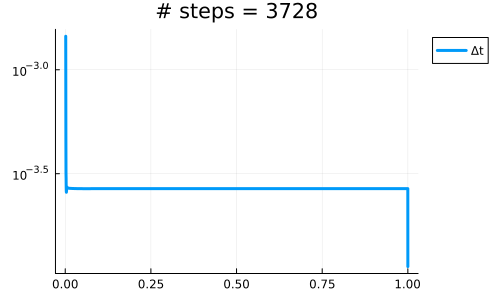

In [157]:
# Let's analyze the numerical solution a bit...
dt = diff(soln.t)
plt1 = plot(soln.t[2:end], dt, yscale = :log10, size = (500, 300), lw = 3, label = "Δt", 
     legend = :outertopright, title = "# steps = $(length(soln.t))")

In [158]:
soln =  solve(prob, Rodas4(),abstol=1e-4);
tv = soln.t
nt = length(tv)

22

In [159]:
errs = zeros(nt-1)
for i = 2:nt
    errs[i-1] = norm(ue.(x[2:nx+1],tv[i]) - soln.u[i],Inf)
end
norm(errs,Inf)

0.0002369385440161853

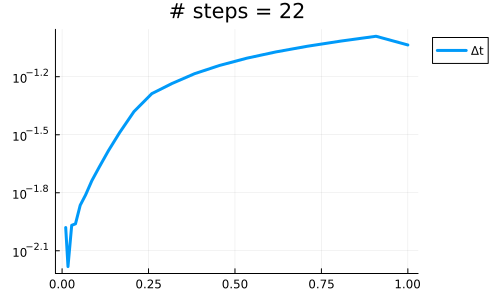

In [160]:
# Let's analyze the numerical solution a bit...
dt = diff(soln.t)
plt1 = plot(soln.t[2:end], dt, yscale = :log10, size = (500, 300), lw = 3, label = "Δt", 
     legend = :outertopright, title = "# steps = $(length(soln.t))")

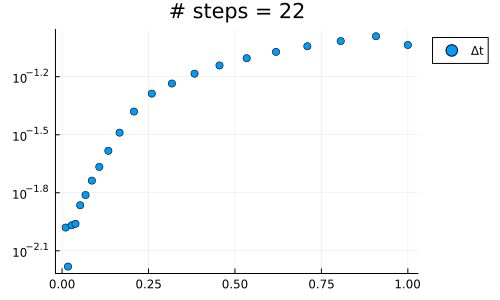

In [161]:
# Let's analyze the numerical solution a bit...
dt = diff(soln.t)
plt1 = scatter(soln.t[2:end], dt, yscale = :log10, size = (500, 300),  label = "Δt", 
     legend = :outertopright, title = "# steps = $(length(soln.t))")

In [ ]:
soln =  solve(prob, Rodas4(),abstol=1e-4);

In [105]:
using SparseArrays
t = 1
Vector([ϕ0(t);spzeros(nx-2);ϕ1(t)])

50-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0848049724711138

At the end, revisit the numerical experiments we performed in Chapter 2 & 3

We can recover the explicit and implicit Euler methods from the semidiscrete formulation

**Remark** For the example above, the matrix $A$ satisfy the conditions of the above theorem with $\eta = 0$.

State the theorem in Iserles's book without proof but say that what we've done above is a sketch of the proof.

**Remark** The above can be generalised easily to all normal matrices, state the fact that normal matrices are unitarily diagonalisable

$$
{\rm e}^{tA}\left({\rm e}^{tA}\right)^{T} = Q{\rm e}^{t\Lambda}Q^{\top}
$$

diagonalise the ODE system

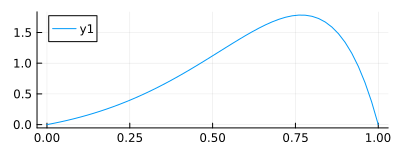

In [31]:
N = 50; 
L = Tridiagonal(ones(N-2), -2*ones(N-1), ones(N-2)) * N^2
X = range(0, 1, length=N+1)
U0 = X .* (1 .- X) .* exp.(3 * X)
plot(X, U0, size = (400, 150))

In [39]:
using OrdinaryDiffEq, Printf
Tf = 1.0
prob = ODEProblem((U, p, t) -> L * U, U0[2:end-1], (0.0, Tf));
soln = solve(prob, RK4());

[ Info: Saved animation to C:\Users\mfaso\OneDrive\Documents\GitHub\Computational-PDEs\LectureNotes\tmp.gif


Plots.AnimatedGif("C:\\Users\\mfaso\\OneDrive\\Documents\\GitHub\\Computational-PDEs\\LectureNotes\\tmp.gif")
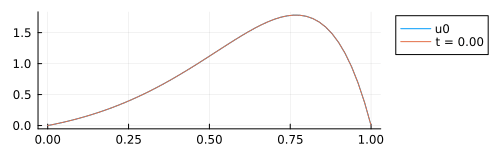

In [40]:
@gif for t in 0.0:0.01:Tf 
    U = [[0.0]; soln(t); [0.0]]
    plot(X, U0, size = (500, 150), label = "u0")
    plot!(X, U, label = "t = " * (@sprintf("%.2f", t)), legend = :outertopright)
end



$$
u_{xx}(x_j,t) = \frac{u(x_{j+1},t_{i}) - 2u(x_j,t_{i}) + u(x_{j-1},t_{i})}{h^2} = u_{xx}(x_j,t_i) + \mathcal{O}(h^2)
$$

$$
v'_j(t) = \frac{1}{h^2}\left(v_{j+1} - 2v_j + v_{j-1}   \right), \qquad j  = 1, \ldots, n_x 
$$

$$
\mathbf{v}'(t) = A \mathbf{v}(t) + \mathbf{h}(t)
$$

$$
\mathbf{v}'(t) = \mathbf{f}(t,\mathbf{v}) \qquad 
$$

$$
\underbrace{\begin{bmatrix}
v'_{1} \\
\vdots \\
\vdots \\
\vdots \\
v'_{n_x}
\end{bmatrix}}_{\mathbf{v}'} = 
\underbrace{\frac{1}{h^2}\begin{bmatrix}
- 2 & 1 & & & \\
1  & -2 & 1  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & 1    & -2 & 1 \\
      &        &        & 1 & -2
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
v_{1} \\
\vdots \\
\vdots \\
\vdots \\
v_{n_x}
\end{bmatrix}}_{\mathbf{v}}
+ 
\underbrace{\frac{1}{h^2}\begin{bmatrix}
\varphi_0(t) \\
0 \\
\vdots \\
0 \\
 \varphi_1(t)
\end{bmatrix}}_{\mathbf{h}(t)}
$$

matrix exponential and diagonalisation

explicit solution of a linear ODE system

Diagonalisation of a system of ODEs

coefficient space

value space

For stability, we require 
$$
\lim_{h \to 0}\left( \max_{n = 0, 1, \ldots, n_t} \| A^n \|_h  \right) \leq c
$$

We'll show that $A$ is a normal matrix but first we recall that $B$ is a TST matrix and therefore its eigenvalues are
$$
\lambda_j = 1 + 2\mu - 2\mu\cos\left(\pi x_j  \right) = 1 + 2\mu -2\mu(1 - 2\sin^2(\pi x_j/2)) = 1 + 4\mu\sin^2(\pi x_j/2).
$$

Hence, we have
$$
B\mathbf{q}_j = \lambda_j\mathbf{q}_j, \qquad j = 1, \ldots, n_x.
$$
Let
$$
Q = \left[\mathbf{q}_1 |  \mathbf{q}_2 | \cdots | \mathbf{q}_{n_x}  \right] \in \mathbb{R}^{n_x \times n_x},
$$
then
$$
BQ = Q\Lambda
$$
where
$$
\Lambda = \begin{bmatrix}
\lambda_1 & & & \\
& \lambda_2 & & \\
 & & \ddots &  \\
&  & & \lambda_{n_x}
\end{bmatrix}.
$$
That is, the spectral factorisation (eigendecomposition) of $B$ is
$$
B = Q\Lambda Q^{-1} =  Q\Lambda Q^{\top}.
$$

In [16]:
nx = 6
μ = 2
B = SymTridiagonal(fill((1 + 2μ),nx),fill(-μ,nx-1))
A = inv(B)
A*A' - A'*A

6×6 Matrix{Float64}:
 -1.38778e-17   0.0           0.0          0.0  0.0   0.0
  0.0           0.0           0.0          0.0  0.0  -3.46945e-18
  0.0           0.0           0.0          0.0  0.0  -6.93889e-18
  0.0           0.0           0.0          0.0  0.0   0.0
  0.0           0.0           0.0          0.0  0.0   0.0
  0.0          -3.46945e-18  -6.93889e-18  0.0  0.0   0.0

Stability analysis via matrix analysis

$$
\lambda_j = 1 + 2\mu - 2\mu\cos\left(\pi x_j  \right) = 1 + 2\mu -2\mu(1 - 2\sin^2(\pi x_j/2)) = 1 + 4\mu\sin^2(\pi x_j/2)
$$

$$
A = B^{-1} = Q\Lambda^{-1}Q^{\top}
$$
$$
A^2 =  Q\Lambda^{-2}Q^{\top}
$$
$$
A^n =  Q\Lambda^{-n}Q^{\top}
$$
$$
\|A^n\| \leq  \|Q\|  \|\Lambda^{-n}\| \|Q^{\top}\| =   \|\Lambda^{-n}\| = \max_{j=1, \ldots, n_x}\vert \lambda^{-n}_j\vert = \left[\max_{j=1, \ldots, n_x}\vert \lambda^{-1}_j\vert\right]^n = \left[\rho(A)\right]^n
$$


$$
\| B \mathbf{x}\|^2 = \langle B \mathbf{x}, B \mathbf{x} \rangle = \left( B \mathbf{x} \right)^{\top}B \mathbf{x} 
$$

$$
\| B \mathbf{x}\|^2 = \langle B \mathbf{x}, B \mathbf{x} \rangle = \left( B \mathbf{x} \right)^{\top}B \mathbf{x} = \mathbf{x}^{\top} Q\Lambda Q^{\top} Q \Lambda Q^{\top}\mathbf{x} =  \mathbf{x}^{\top} Q\Lambda^2  Q^{\top}\mathbf{x}
$$

$$
\| Q\mathbf{x}\|^2 = \langle Q \mathbf{x}, Q \mathbf{x} \rangle = \left( Q \mathbf{x} \right)^{\top}Q \mathbf{x}  = \| \mathbf{x} \|^2
$$

In [17]:
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
error = ue.(xx,tt) - u 
e1 = maximum(error)

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 52 and 8

In [18]:
μ = 0.50*nx
u,x,t = @time BackwardEuler(f,ϕ0,ϕ1,nx,μ,T)
nt = length(t) -1

  0.000035 seconds (75 allocations: 8.906 KiB)


16

In [19]:
xx = x' .* ones(nt+1)
tt = ones(nx+2)' .* t
error = ue.(xx,tt) - u 
e1 = maximum(error)

0.9999999999999999

Renam Euler's method as explicit Euler's method?

state the bound on the norm for the case in which $A$ has a complete eigendecomposition

$\mu \leq \frac{1}{2}$ is quite restrictive

Numerical experiments: instability depending on the value of $\mu$, how the diffusion equation smooths things out and the equilibrium solution is an ODE BVP

$$
\mathbf{u}^i = 
\begin{bmatrix}
u^i_{1} \\
\vdots \\
u^i_{n_x}
\end{bmatrix}, \qquad
\tilde{\mathbf{u}}^i = 
\begin{bmatrix}
\tilde{u}^i_{1} \\
\vdots \\
\tilde{u}^i_{n_x}
\end{bmatrix}
$$

Note here we can just replace the FD matrix $A$ with the collocation matrix and/or the ultraspherical equivalent

(forward) Euler method
$$
\mathbf{v}'(t_i) \approx \frac{\mathbf{u}^{i+1} - \mathbf{u}^{i}}{\tau}
$$
set
$$
\frac{\mathbf{u}^{i+1} - \mathbf{u}^{i}}{\tau} = \mathbf{f}(t_i,\mathbf{u}^{i})
$$
$$
\mathbf{u}^{i+1} = \mathbf{u}^{i} + \tau \mathbf{f}(t_i,\mathbf{u}^{i})
$$
Setting 
$$
\mathbf{f}(t,\mathbf{x}) = A\mathbf{x} + \mathbf{h}(t) 
$$
we recover Euler's method from before

## Implicit methods

Backward Euler method:
$$
\mathbf{v}'(t_i) \approx \frac{\mathbf{u}^{i} - \mathbf{u}^{i-1}}{\tau}
$$
hence
$$
\mathbf{u}^{i} = \mathbf{u}^{i-1} + \tau\mathbf{f}(t_i,\mathbf{u}^{i})
$$
or
$$
\mathbf{u}^{i+1} = \mathbf{u}^{i} + \tau\mathbf{f}(t_{i+1},\mathbf{u}^{i+1})
$$
This is an implicit method
$$
\left( I - \tau A   \right)\mathbf{u}^{i+1}= \mathbf{u}^{i} + \tau\mathbf{h}(t_{i+1})
$$

$$
I - \tau A = \begin{bmatrix}
1 + 2\mu & -\mu & & & \\
-\mu  & 1+2\mu & -\mu  & & \\
      & \ddots & \ddots & \ddots & \\
      &        & -\mu    & 1+2\mu & -\mu \\
      &        &        & -\mu & 1+2\mu
\end{bmatrix}   \in \mathbb{R}^{n_x \times n_x}
$$

## Chebyshev collocation method

## Chebyshev method

See Manolis's discussion on the computational cost of the method

**Order:** It is left as an exercise to show that the Backward Euler method is second order.

**Stability:** In the von Neumann analysis, we consider the problem on the whole real line, then the Backward Euler method is
$$
-\mu u^{i+1}_{j-1} + (1 + 2\mu)u^{i+1}_j - \mu u^{i+1}_{j+1} = u^{i}_j
$$
Setting $u^{i}_j = \lambda^i {\rm e}^{{\rm i} k x_j}$, then we find that
$$
\lambda = \frac{1}{1 + 4\mu \sin^2(kh/2)}
$$
and therefore $\vert \lambda \vert \leq 1$ for all $\mu > 0$, hence we say that the Backward Euler method for the diffusion equation is unconditionally stable.  The implications of this for time stepping restrictions

Give an intutive feeling of what the solution to the diffusion equation does and how it differs from the solution to the advection equation.

Look at the excellent exercises in Iserles's book

Semi-discrete methods also have an order

An equation with a variable coefficient

Von Neumann stability analysis of a semi-discrete scheme

Matrix stability analysis for a Fourier spectral and Chebyshev method.  For Fourier, show how the method performs on a solution that is periodic and one that is not periodic.

Backward Euler, Crank-Nicholson

The above $v$ equation is a linear system whose exact solution is known... matrix exponentials and diagonalisation

Approximate a PDE by a system of ODEs

The Fourier and Chebyshev methods we looked at before fit into this framework, these methods are ideally suited to the matrix stability analysis approach.

von Neumann stability analysis

Multistep method, e.g., leap frog method

How to do order analysis

How to do stability analysis, matrix methods and Fourier methods

Explicit and implicit

Method of lines with well-known ODE integrators and black box integrators

Go into matrix and operator norms?

Order, stability and convergence

How the value of $\mu$ relates to step size restrictions

In this chapter we discuss:
1. 
2. 
3. 

1. Finite difference method for 2-point boundary value problems and consistency and stability and convergence
2. Compare FD, collocation and ultraspherical and Fourier for periodic problems, convergence analysis for collocation and ultraspherical is beyond the scope 
3. The next step is boundary value problems in two dimensions
4. In the next chapter do stability analysis for time dependent problems and do method of lines

One method to design FD methods is to use FD operators, see Iserles's book

Method of separation of variables

In the large-time limit, $u_t \to 0$, steady state or equilibrium solution

explicit and implicit

Lax equivalence theorem

2-point BVPs

Well-posed and ill-posed equations

There is more to numerical methods than order and stability, these are only necessary conditions for good methods but they are not sufficient.  There is also structure preservation.

Nonlinear equations

Must include automatic differentiation for nonlinear equations

exponential integrators

Hermite method on the line?

Look at Christoph Ortner's notes

The Fourier transform approach to stability of semi-discrete methods

Distinguish semi-discrete methods and fully discretised methods